In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("problem1.csv")
data.head(3)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,target
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1


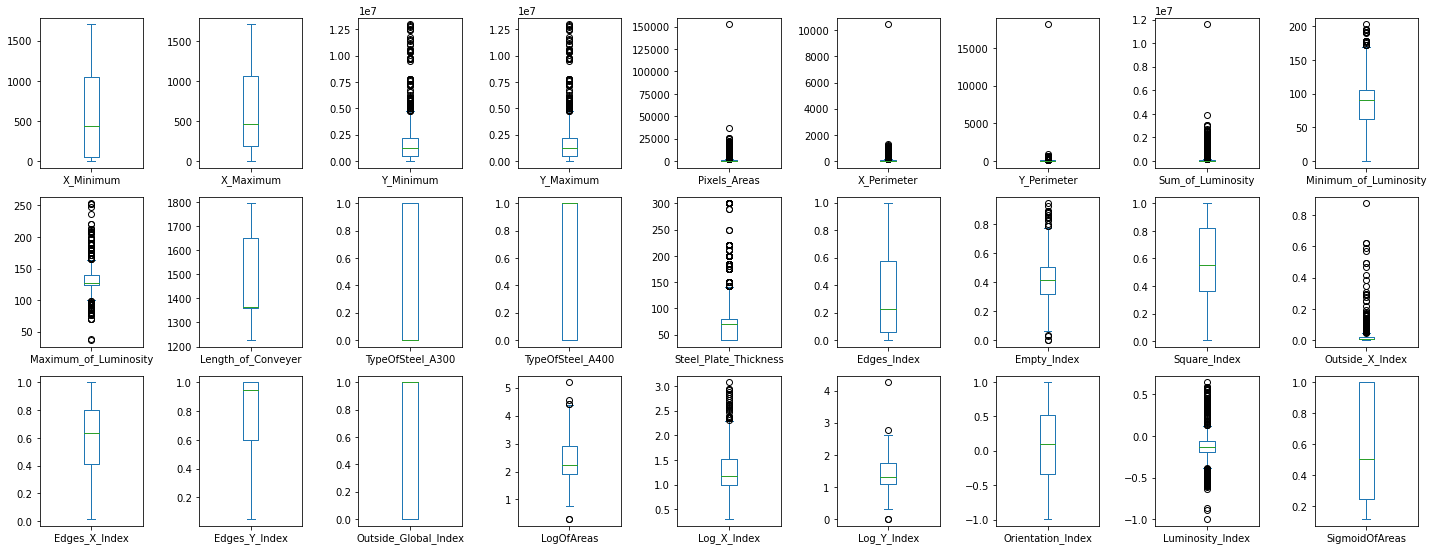

In [2]:
data.drop(columns=['target']).plot(kind='box', subplots=True, layout=(4,9), figsize=(20,10))
plt.tight_layout()
plt.show()

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

data['average']=(data['X_Minimum']+data['X_Maximum'])/2
value="+".join(list(data.drop(columns=['target']).columns))

model=ols(f'target~{value}', data=data)

model.exog_names

['Intercept',
 'X_Minimum',
 'X_Maximum',
 'Y_Minimum',
 'Y_Maximum',
 'Pixels_Areas',
 'X_Perimeter',
 'Y_Perimeter',
 'Sum_of_Luminosity',
 'Minimum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Length_of_Conveyer',
 'TypeOfSteel_A300',
 'TypeOfSteel_A400',
 'Steel_Plate_Thickness',
 'Edges_Index',
 'Empty_Index',
 'Square_Index',
 'Outside_X_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'Outside_Global_Index',
 'LogOfAreas',
 'Log_X_Index',
 'Log_Y_Index',
 'Orientation_Index',
 'Luminosity_Index',
 'SigmoidOfAreas',
 'average']

In [5]:
vif=pd.DataFrame({'col':col, 'VIF':variance_inflation_factor(model.exog, i)}
                for i, col in enumerate(model.exog_names[1:])).sort_values('VIF', ascending=False)

C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\taeeu\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [6]:
vif.head

<bound method NDFrame.head of                       col           VIF
13  Steel_Plate_Thickness           inf
1               X_Maximum           inf
2               Y_Minimum           inf
12       TypeOfSteel_A400           inf
4            Pixels_Areas  1.703264e+10
3               Y_Maximum  1.703244e+10
7       Sum_of_Luminosity  1.559205e+03
22            Log_X_Index  1.185824e+03
18          Edges_X_Index  1.000563e+03
23            Log_Y_Index  4.911691e+02
5             X_Perimeter  4.907086e+02
24      Orientation_Index  4.055794e+02
8   Minimum_of_Luminosity  3.661924e+02
6             Y_Perimeter  1.687822e+02
25       Luminosity_Index  3.826412e+01
16           Square_Index  2.645508e+01
26         SigmoidOfAreas  1.293111e+01
27                average  9.611151e+00
20   Outside_Global_Index  9.438620e+00
9   Maximum_of_Luminosity  8.324323e+00
10     Length_of_Conveyer  6.036402e+00
21             LogOfAreas  5.831323e+00
19          Edges_Y_Index  5.708240e+00
11       T